In [8]:
import pandas as pd
import numpy as np
from transformers import pipeline
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nlp

In [9]:
from datasets import load_dataset

emotions = load_dataset('emotion')

No config specified, defaulting to: emotion/split


Extracting data files: 100%|██████████| 3/3 [00:00<00:00, 103.26it/s]


Dataset emotion downloaded and prepared to /home/raj/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


100%|██████████| 3/3 [00:00<00:00, 872.06it/s]


In [10]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [14]:
emotions["train"][1000]

{'text': 'i need to do the best i possibly can do and even when i get out at i feel too listless to study like right now',
 'label': 0}

In [15]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [20]:
label_name = emotions["train"].features['label'].names

In [21]:
label_name

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [22]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [23]:
train = pd.DataFrame(emotions["train"])
train.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


Pre-processing

In [25]:
emotions.set_format(type='pandas')

df = emotions['train'][:]

display(df.tail())

def label_int2str(row):
    return emotions['train'].features['label'].int2str(row)

df['label_name'] = df['label'].apply(label_int2str)

display(df.head())

,text,label
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3
15999,i know a lot but i feel so stupid because i ca...,0


,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


Class distribution of Label name

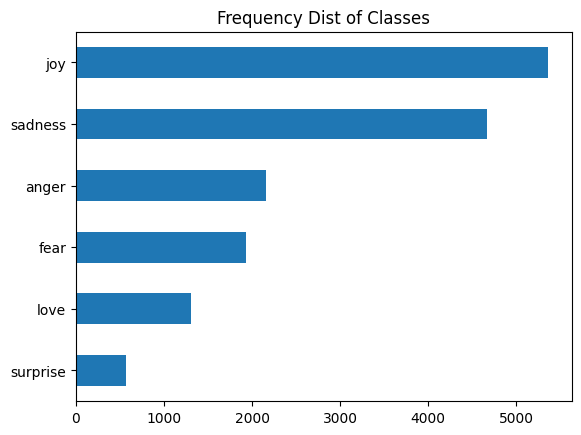

In [28]:
import matplotlib.pyplot as plt

df['label_name'].value_counts(ascending=True).plot.barh()

plt.title('Frequency Dist of Classes')

plt.show()

In [ ]:
train['length_of_text'] = [len(i.split(" ")) for i in train['text']]

In [ ]:
train['length_of_text'] = [len(i.split(" ")) for i in train['text']]

fig = px.histogram(train['length_of_text'], marginal='box', labels={'value': "Length of the Text"} )

fig.update_traces(marker=dict(line=dict(color='#000000', width=2) ))

fig.update_layout(title_text = 'Distribution of the Length of Text by Emotions ', title_x=0.5, title_font=dict(size=20)  )

fig.show()

In [30]:
FreqOfWords = train['text'].str.split(expand=True).stack().value_counts()

FreqOfWords_top200 = FreqOfWords[:200]

FreqOfWords_top200.index

Index(['i', 'feel', 'and', 'to', 'the', 'a', 'feeling', 'that', 'of', 'my',
       ...
       'few', 'year', 'thought', 'first', 'times', 'family', 'started', 'able',
       'said', 'week'],
      dtype='object', length=200)

In [ ]:
fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0)

fig.update_layout(title_text = 'Freq of the words in Train Dataset', title_x = 0.5, title_font=dict(size=20))

fig.update_traces(textinfo='label+value')
fig.show()

In [36]:
train.head()

,text,label,length_of_text
0,i didnt feel humiliated,0,4
1,i can go from feeling so hopeless to so damned...,0,21
2,im grabbing a minute to post i feel greedy wrong,3,10
3,i am ever feeling nostalgic about the fireplac...,2,18
4,i am feeling grouchy,3,4


In [37]:
def tokenization(inputs):
    return word_tokenize(inputs)

train['text_tokenized'] = train['text'].apply(tokenization)

train.head()

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/home/raj/nltk_data'
    - '/home/raj/.conda/envs/raj/nltk_data'
    - '/home/raj/.conda/envs/raj/share/nltk_data'
    - '/home/raj/.conda/envs/raj/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [ ]:
stop_words = set(stopwords.words('english'))

def stopwords_remove(inputs):
    return [item for item in inputs if item not in stop_words]

train['text_after_removing_stopwords'] = train['text_tokenized'].apply(stopwords_remove)

train.head()

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatization(inputs):
    return [lemmatizer.lemmatize(word=x, pos='v') for x in inputs]

train['text_lemmatized'] = train['text_after_removing_stopwords'].apply(lemmatization)

train.head()